# Lecture 4 - Model Free Control

provided by [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a></li>
    <li>2. <a href="#2.-Model-free-Policy-Iteration:-MC-Evaluation">Model-free Policy Iteration: MC Evaluation</a></li>
    <li>3. <a href="#3.-Model-free-Policy-Iteration:-TD-Evaluation">Model-free Policy Iteration: TD Evaluation</a></li>
    <li>4. <a href="#4.-Model-free-Policy-Iteration:-Q-Learning">Model-free Policy Iteration: Q-Learning</a></li>
    <li>5. <a href="#5.-Model-free-Policy-Iteration:-Double-Q-Learning">Model-free Policy Iteration: Double-Q-Learning</a></li>
    <li>6. <a href="#6.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

Last time we focused on environment model-free policy evaluation. Now we focus on environment model-free policy control. This lecture focuses on optimization and exploration.

Control involves:
- optimization
- delayed consequences
- exploration

There are many model-free control examples (like Go, Backgammon). 

> __On-policy learning__ : direct  experience; learn to estimate/evaluate a policy from experience obtained via that policy

> __Off-policy learning__ : learn to estimate/evaluate a policy using experience obtained from a different policy

# 2. Model-free Policy Iteration: MC Evaluation

Okay, let's do a quick recap. 

We remember Policy Iteration for a model-based MDP (Lecture 2). It incorporates dynamic programming as the evaluation method with Q-learning for the improvement. Now we are in a model-free MDP. Our evaluation methods are from Lecture 3 (MC and TD). Our improvement method will be seen shortly (it is very similar to model-based).

Initialize policy $\pi$ <br>
Repeat <br>
$\quad$ Policy evaluation: $Q^{\pi}(s, a)$ from MC <br>
$\quad$ Policy improvement: update $\pi$
<br><br>
_Algorithm 1. Policy Iteration for Model-Free MDPs with MC Evaluation._

The "Policy improvement" part is very simple. It is exactly like the policy improvement method in PI for model-based MDPs in Lecture 2.

$$
Given ~~ an ~~ estimate ~~ Q^{\pi_{i}}(s, a) ~~ \forall ~ s, a \\
Update ~~ new ~~ policy \\
\\
\pi_{i + 1} = \underset{a}{argmax}(Q^{\pi}(s, a))  \hspace{1em} (Eq.~1)\\
$$

This current policy iteration lacks one thing: exploration. We don't want our policy/agent to select the same action each time because there can be delayed rewards and consequences. 

> __$\epsilon$-greedy__ : simple mechanism that uses an $\epsilon$ value that decreases with policy iteration to balance exploration and exploitation.

$$
\epsilon-greedy(Q^{\pi}(s, a)) = \pi(a~|~s) = 
\left\{
    \begin{array}{lr}
        1 - \epsilon \quad\quad \underset{a}{argmax}Q^{\pi}(s, a)\\
        \frac{\epsilon}{|A|} \quad\quad a
    \end{array}
\right.
\hspace{1em} (Eq.~2)\\
$$

Simply put, the chance of exploitation is $1 - \epsilon$. The chance of choosing any action out of the action space (exploration) $A$ is the $\epsilon$ divided by the number of actions. 

I skip over the theorem proof, but it essentially means there will be monotonic improvement for any $\epsilon$-greedy policy $\pi_{i}$.

> __Greedy in the Limit of Infinite Exploration (GLIE)__ : all state-action pairs are visited an $\infty$ number of times; behavior policy converges to greedy policy (basically meaning we transition from exploration and/or exploitation to mostly if not fully exploitation).

This can be represented mathematically:

$$
\underset{i \rightarrow \infty}{lim} N_{i}(s, a) \rightarrow \infty
$$

One simple GLIE method is reducing $\epsilon$-greedy to 0 with the rate: $\epsilon_{i} = 1/i$ where $i$ is the episode.

Now that we have the exploration vs. exploitation component figured out, let's combine it with our current working understanding of model-free PI with MC. 



Initialize $Q(s, a) = 0, N(s, a) = 0 ~~\forall~ s, a$ <br>
Initialize $\epsilon = 1, k = 1$ <br>
Loop <br>
$\quad$ Sample $k$-th episode $(s_{k, 1}, a_{k, 1}, r_{k, 1}, s_{k, 2}, ..., s_{k, T})$ given $\pi_{k}$ <br>
$\quad$ $G_{k, t} = r_{k, t} + \gamma r_{k, t + 1} + ... + \gamma^{T_{i} - 1}r_{k, T_{i}}$ <br>
$\quad$ for t = 1, ..., T do <br>
$\quad\quad$ If First/Every visit to (s, a) in episode $k$ then <br>
$\quad\quad\quad$ $N(s, a) = N(s, a) + 1$ <br>
$\quad\quad\quad$ $Q(s, a) = Q(s, a) + \frac{1}{N(s, a)}(G_{k ,t} - Q(s_{t}, a_{t}))$ <br>
$\quad$ $k = k + 1$, $\epsilon = \frac{1}{k}$ <br>
$\quad$ $\pi_{k} = \epsilon- greedy$(Q)
<br><br>

_Algorithm 2. MC Policy Iteration with Exploration (builds on Algorithm 1)._

# 3. Model-free Policy Iteration: TD Evaluation

TD Evaluation for model-free policy iteration is very similar to the MC evaluation version above. It shares the same general format as shown in Eq. 1.

Below is the algorithm:

Initialize $\epsilon$-greedy policy $\pi$ randomly, $t = 0$, initial state $s_{t} = s_{0}$ <br>
Take $a_{t} \sim \pi(s_{t})$ <br>
Observe ($r_{t}$, $s_{t + 1}$) <br>
Loop <br>
$\quad$ Take action $a_{t + 1} \sim \pi(s_{t + 1})$ <br>
$\quad$ Observe ($r_{t + 1}$, $s_{t + 2}$) <br>
$\quad$ Update $Q$ given ($s_{t}, a_{t}, r_{t}, s_{t + 1}, a_{t + 1}$) <br>
$\quad\quad$ $Q(s_{t}, a_{t}) = \alpha(Q(s_{t}, a_{t})) + (1 - \alpha)(r_{t} + \gamma Q(s_{t + 1}, a_{t + 1}) - Q(s_{t}, a_{t}))$ <br>
$\quad$ Perform policy improvement <br>
$\quad\quad$ $\pi(s_{t}) = \underset{a}{argmax}Q(s_{t}, a_{t}) + \epsilon - greedy$ <br>
$\quad$ $t = t + 1$ 
<br><br>

_Algorithm 3. SARSA Algorithm (TD Evaluation)._

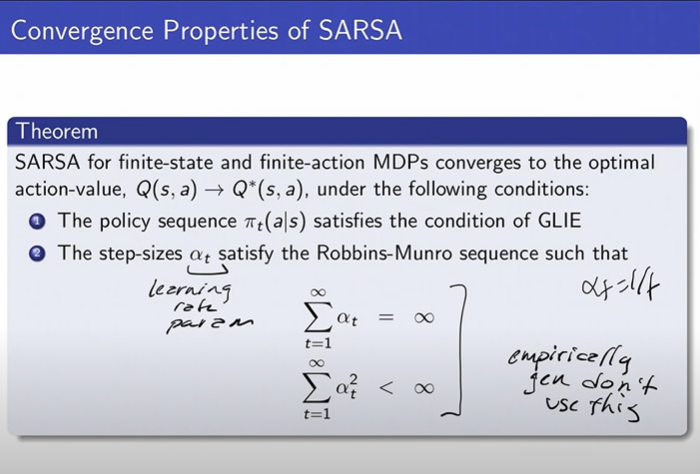 <br>
_Figure 1. SARSA Convergence Theorem._

In practice, you don't want a learning rate that satisfies the above expressions.

# 4. Model-free Policy Iteration: Q-Learning

Initialize $Q(s, a) ~~ \forall ~ s \in S, a \in A$, $t = 0$, initial state $s_{t} = s_{0}$ <br>
Set $\pi_{b}$ to be $\epsilon - greedy$ w.r.t. $Q$ <br>
Loop <br>
$\quad$ Take action $a_{t} \sim \pi_{b}(s_{t})$ <br>
$\quad$ Observe ($r_{t}$, $s_{t + 1}$) <br>
$\quad$ Update $Q$ given ($s_{t}, a_{t}, r_{t}, s_{t + 1}$) <br>
$\quad\quad$ $Q(s_{t}, a_{t}) = \alpha(Q(s_{t}, a_{t})) + (1 - \alpha)(r_{t} + \gamma \underset{a}{max}(Q(s_{t}, a_{t})) - Q(s_{t}, a_{t}))$ <br>
$\quad$ Perform policy improvement <br>
$\quad\quad$ $\pi(s_{t}) = \underset{a}{argmax}Q(s_{t}, a_{t}) + \epsilon - greedy$ <br>
$\quad$ $t = t + 1$ 
<br><br>

_Algorithm 4. Q-Learning PI._

Initializing Q does not matter asymptotically. However, initializing it optimistically is better empirically.

Conditions sufficient to ensure Q-learning with $\epsilon - greedy$ converges to optimal $Q^{*}$?
* visit all state, action pairs infinitely often
* SARSA algorithm conditions on $\alpha$

Conditions sufficient to ensure Q-learning with $\epsilon - greedy$ converges to optimal $\pi^{*}$?
* GLIE

# 5. Model-free Policy Iteration: Double Q-Learning

> __Maximization Bias__ : the problem when your network or policy overestimates the q-value (you have no way of reinforcing that that q-value is the best action)

A way to tackle maximization bias is through double q-learning, which essentially uses 2 Q matrices instead of 1. One Q matrix (policy) will be used for decision making and one is used for estimating the state-action q-value.

Initialize $Q_{1}(s, a)$ and $Q_{2}(s, a)$ $\forall ~ s \in S, a \in A$ <br>
Initialize $t = 0$, initial state $s_{t} = s_{0}$ <br>
Loop <br>
$\quad$ Select $a_{t}$ using $\epsilon - greedy$ $\pi(s) = \underset{a}{argmax}(Q_{1}(s_{t}, a_{t}) + Q_{2}(s_{t}, a_{t}))$ <br>
$\quad$ Observe $(r_{t}, s_{t + 1})$ <br>
$\quad$ if (with 0.5 probability) then <br>
$\quad\quad$ $Q_{1}(s_{t}, a_{t}) = Q_{1}(s_{t}, a_{t}) + \alpha(r_{t} + \gamma Q_{2}(s_{t + 1}, \underset{a}{argmax}Q_{1}(s_{t + 1}, a_{t + 1})) - Q_{1}(s_{t}, a_{t}))$ <br>
$\quad$ else <br>
$\quad\quad$ $Q_{2}(s_{t}, a_{t}) = Q_{2}(s_{t}, a_{t}) + \alpha(r_{t} + \gamma Q_{1}(s_{t + 1}, \underset{a}{argmax}Q_{2}(s_{t + 1}, a_{t + 1})) - Q_{2}(s_{t}, a_{t}))$ <br>
$\quad$ $t = t + 1$
<br><br>
_Algorithm 5. Double Q-learning._

Q-learning tends to spend more time selecting suboptimal actions compared to Double Q-learning.

# 6. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS234](https://www.youtube.com/watch?v=FgzM3zpZ55o)
- [Course Website](http://web.stanford.edu/class/cs234/index.html)

This is a series of 15 lectures provided by Stanford.
